In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn

In [3]:
data = pd.read_csv('data/no_hashtags.csv')

In [4]:
data = data.loc[data['target']==0]
data.head()

,text,product,target,clean
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,0,tweeting rise dead need upgrade plugin station
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,0,hope year festival crashy year
16,I just noticed DST is coming this weekend. How...,iPhone,0,noticed coming weekend many user hour late com...
37,@mention - False Alarm: Google Circles Not Co...,Google,0,false alarm circle coming probably ever circle...
62,Again? RT @mention Line at the Apple store is ...,NaN,0,line store insane


In [5]:
def build_corpus(data):
    corpus = []
    for sentence in data.iteritems():
        word_list = sentence[1].split(" ")
        corpus.append(word_list)
    return corpus

corpus = build_corpus(data['clean'])

In [ ]:
# from gensim.models import Word2Vec
# from nltk import word_tokenize

# X_train_token = X_train.map(word_tokenize)
# model = Word2Vec(X_train_token, window=5, min_count=1, workers=4)

In [7]:
from gensim.models import Word2Vec
model = Word2Vec(corpus, size=100, min_count=1)

In [8]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.decomposition import PCA
vectors = model[model.wv.vocab]
words = list(model.wv.vocab)
pca = PCA(n_components=2)
PCA_result = pca.fit_transform(vectors)

In [9]:
words = pd.DataFrame(words)
PCA_result = pd.DataFrame(PCA_result)
PCA_result['x_values'] =PCA_result.iloc[0:, 0]
PCA_result['y_values'] =PCA_result.iloc[0:, 1]
PCA_final = pd.merge(words, PCA_result, left_index=True, right_index=True)
PCA_final['word'] =PCA_final.iloc[0:, 0]
PCA_data_complet =PCA_final[['word','x_values','y_values']]
PCA_data_complet.to_csv('data/PCA_data_negative.csv',index=False)

In [10]:
# word frequencies calculation
from collections import Counter
# count unique words
def counter_word(text_col):
    count = Counter()
    for text in text_col.values:
        for word in text.split():
            count[word] += 1
    return count

counter_all = counter_word(data['clean'])
words_all = counter_all.most_common(500)

words_all= pd.DataFrame(words_all)
words_all['word'] = words_all.iloc[0:, 0]
words_all['count'] = words_all.iloc[0:, 1]
words_all = words_all[['word','count']]
words_all.to_csv('data/negative_words.csv', columns=['word','count'], index=False)

In [12]:
# restriction to 100 most frequent words
top500_words = pd.read_csv('data/negative_words.csv')
PCA_data_top_500 = PCA_data_complet.merge(top500_words, how='inner', left_on='word',right_on='word')
PCA_data_top_500.to_csv('data/PCA_data_500.csv', index=False)

In [17]:
# words_1k = counter_all.most_common(1000)

# words_1k= pd.DataFrame(words_1k)
# words_1k['word'] = words_1k.iloc[0:, 0]
# words_1k['count'] = words_1k.iloc[0:, 1]
# words_1k = words_1k[['word','count']]
# words_1k.to_csv('data/top1000_words.csv', columns=['word','count'], index=False)

# # restriction to 100 most frequent words
# top1000_words = pd.read_csv('data/top1000_words.csv')
# PCA_data_top_1000 = PCA_data_complet.merge(top1000_words, how='inner', left_on='word',right_on='word')
# PCA_data_top_1000.to_csv('data/PCA_data_top_1000.csv', index=False)

In [13]:
import seaborn as sns

plt.style.use('seaborn')

In [45]:
def process_data(file):
    df = pd.read_csv(file).drop([0,1]).reset_index(drop=True)
    num_cols = ['x_values', 'y_values', 'Silhouette']
    df[num_cols] = df.loc[:, num_cols].astype('float64')
    return df
    
def plot_cluster(df):
    fig = sns.lmplot(x='x_values', y='y_values', data=df, fit_reg=False, legend=True, hue='Cluster', palette='Paired')
    fig = plt.gcf()
    fig.set_size_inches(8, 6)
    plt.show()

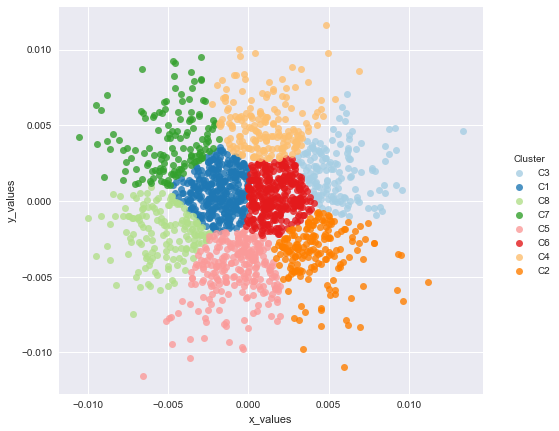

In [23]:
cluster8_data = process_data('data/negative/cluster8_negative.csv')
plot_cluster(cluster8_data)

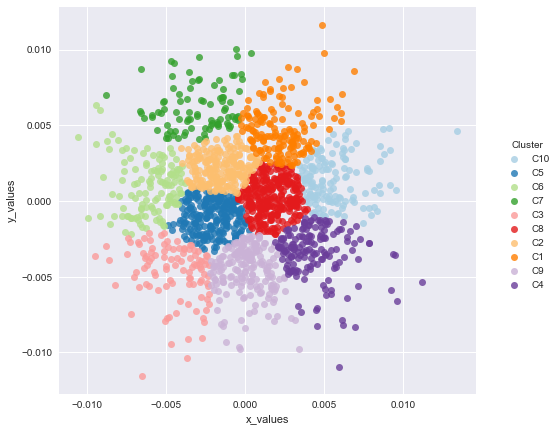

In [25]:
cluster10_data = process_data('data/negative/cluster10_negative.csv')
plot_cluster(cluster10_data)

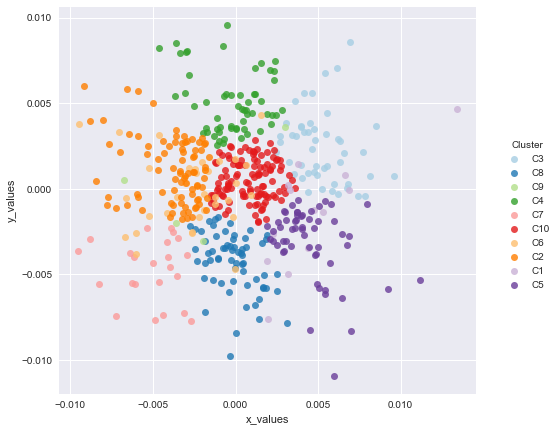

In [39]:
cluster10_negative = process_data('data/negative/cluster10_count.csv')
plot_cluster(cluster10_negative)

In [26]:
# cluster4_data = process_data('data/cluster_top1000.csv')
# plot_cluster(cluster4_data)

In [27]:
# cluster5_data = process_data('data/cluster5_top1000.csv')
# plot_cluster(cluster5_data)

In [28]:
# cluster6_data = process_data('data/cluster6_top1000.csv')
# plot_cluster(cluster6_data)

In [30]:
cluster8_data.groupby('Cluster').agg(['count', 'mean'])['Silhouette']

,count,mean
Cluster,,
C1,323,0.604238
C2,179,0.596511
C3,153,0.594770
C4,184,0.595453
C5,254,0.599326
C6,310,0.603941
C7,139,0.573061
C8,157,0.594440


In [31]:
cluster10_data.groupby('Cluster').agg(['count', 'mean'])['Silhouette']

,count,mean
Cluster,,
C1,157,0.590624
C10,143,0.591986
C2,212,0.609420
C3,104,0.574926
C4,160,0.590102
C5,227,0.606541
C6,126,0.593044
C7,89,0.591816
C8,288,0.602697


In [50]:
def process_data_count(file):
    df = pd.read_csv(file).drop([0,1]).reset_index(drop=True)
    num_cols = ['x_values', 'y_values', 'count', 'Silhouette']
    df[num_cols] = df.loc[:, num_cols].astype('float64')
    return df

cluster10_negative = process_data_count('data/negative/cluster10_count.csv')

cluster10_negative.groupby('Cluster').agg(['count', 'mean'])#['count', 'Silhouette']

x_values           y_values           count            Silhouette  \
           count      mean    count      mean count       mean      count   
Cluster                                                                     
C1            13  0.004687       13 -0.001431    13  22.076923         13   
C10          114  0.000823      114  0.000532   114   4.157895        114   
C2            85 -0.003870       85  0.001085    85   3.741176         85   
C3            49  0.005216       49  0.002401    49   5.040816         49   
C4            58 -0.000244       58  0.005007    58   4.275862         58   
C5            56  0.004502       56 -0.003081    56   4.553571         56   
C6            34 -0.002745       34 -0.000062    34  14.764706         34   
C7            23 -0.005157       23 -0.004730    23   3.913043         23   
C8            64 -0.000128       64 -0.004286    64   3.953125         64   
C9             4 -0.002340        4 -0.000233     4  38.500000          4   

                   
             mean  
Cluster            
C1       0.555555  
C10      0.600552  
C2       0.572473  
C3       0.557336  
C4       0.576432  
C5       0.569578  
C6       0.582976  
C7       0.582717  
C8       0.583894  
C9       0.588865

In [33]:
cluster_dict = {}
for i in range(1,9):
    cluster_dict[f'Cluster {i}'] = cluster8_data.loc[cluster8_data['Cluster']==f'C{i}']

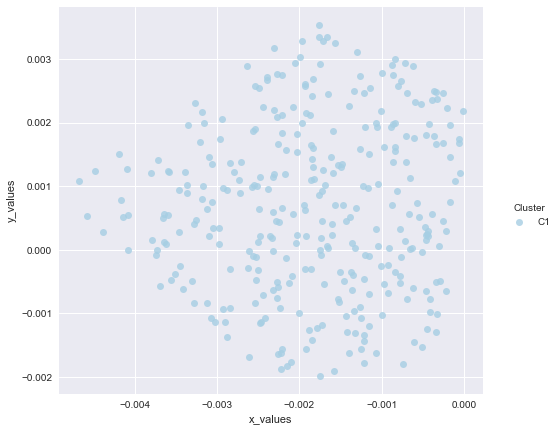

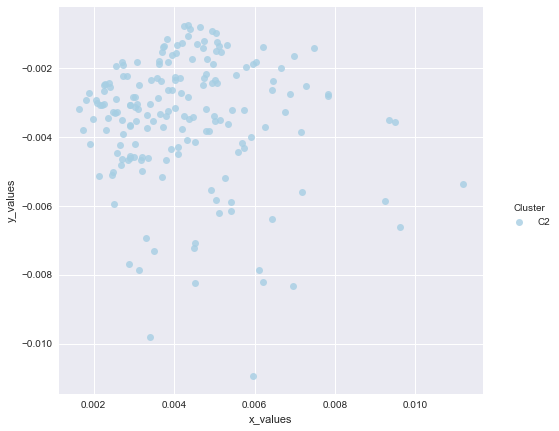

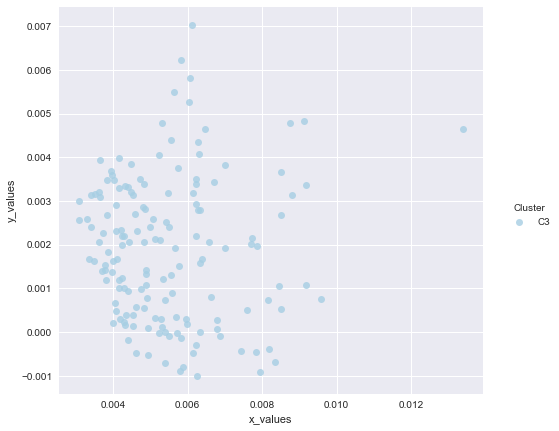

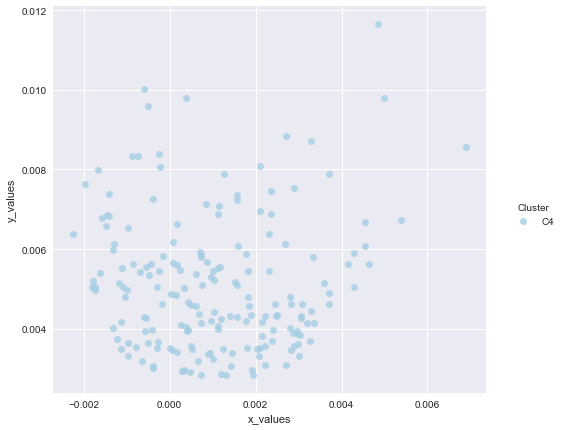

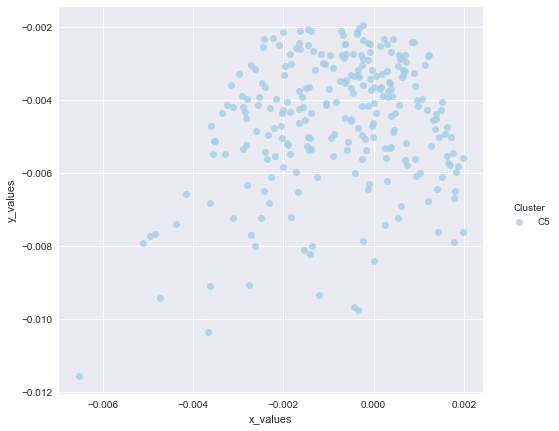

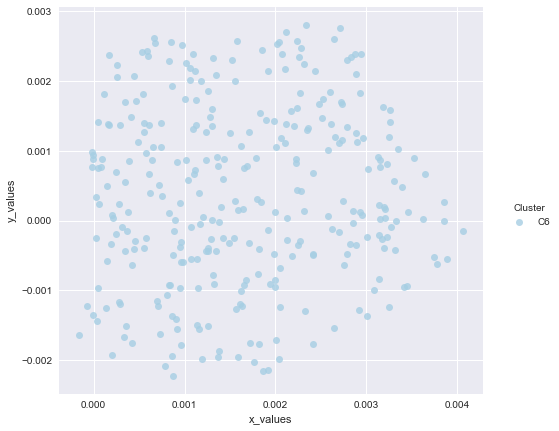

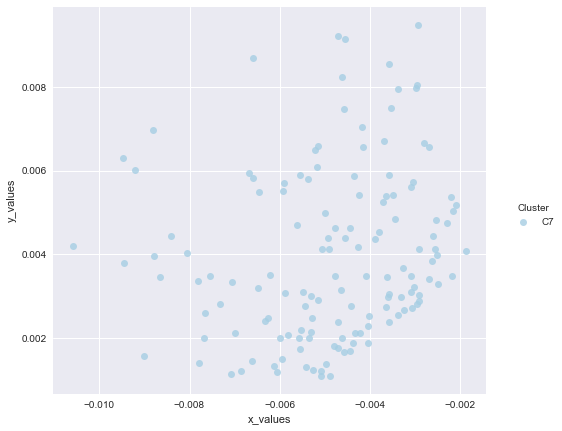

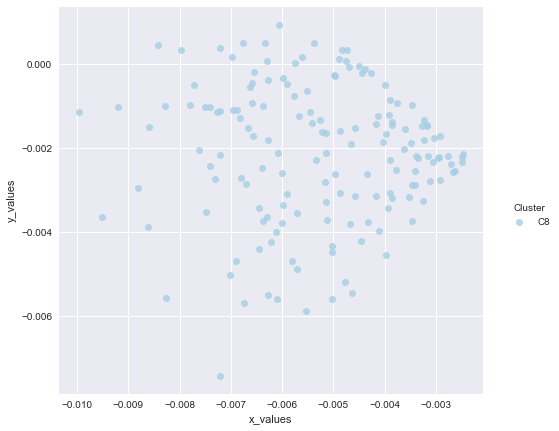

In [34]:
for i in range(1,9):
    plot_cluster(cluster_dict[f'Cluster {i}'])

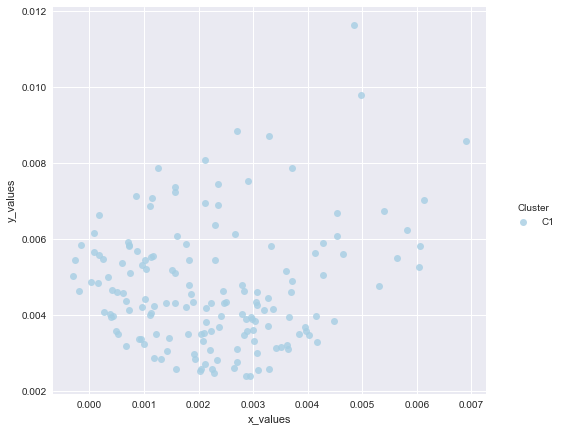

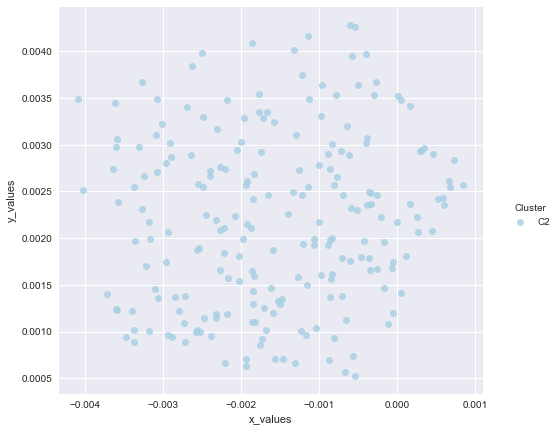

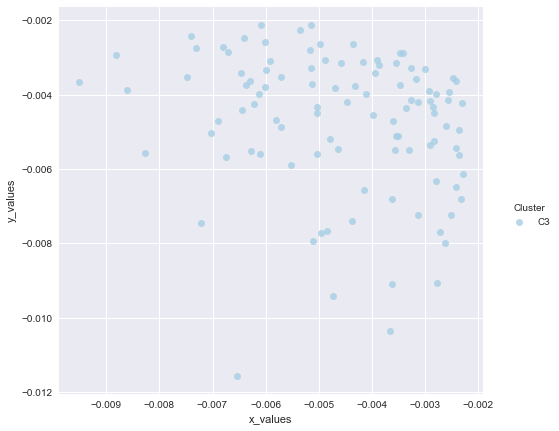

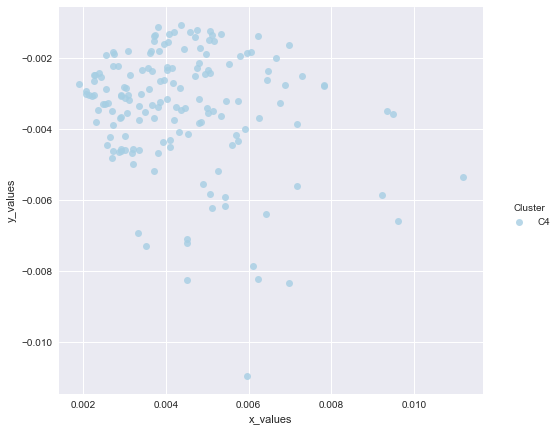

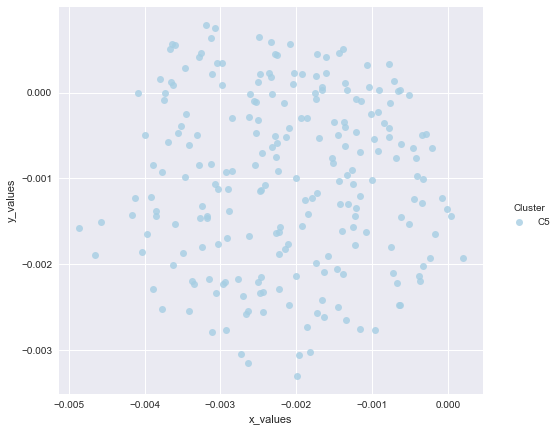

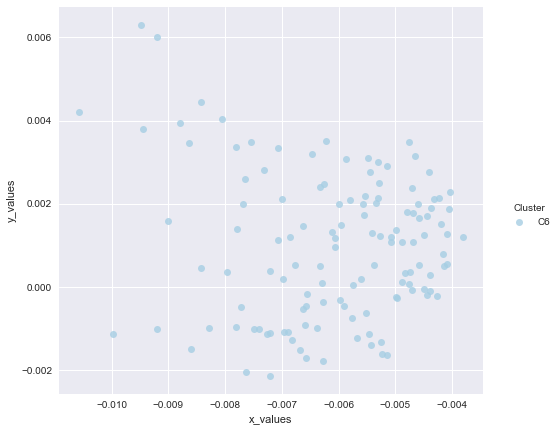

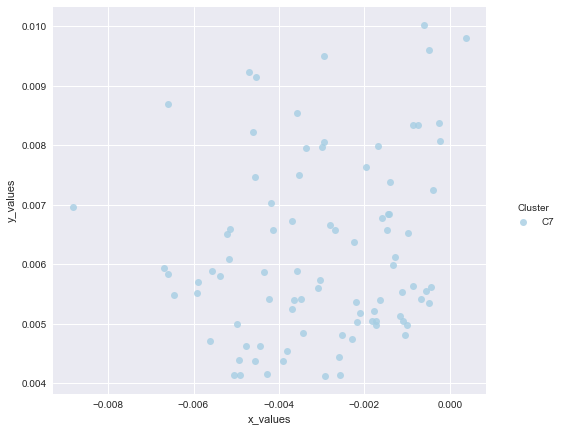

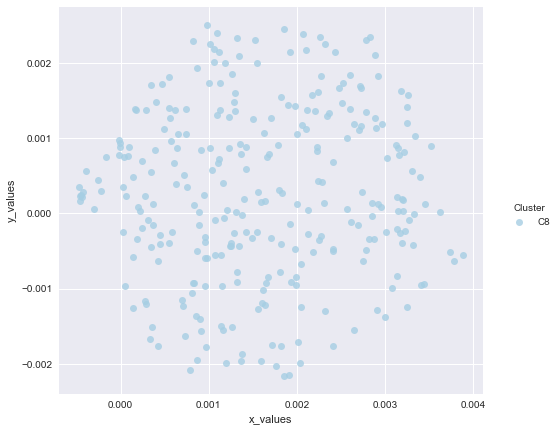

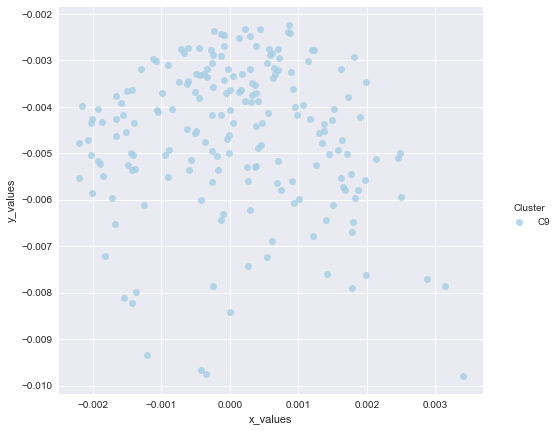

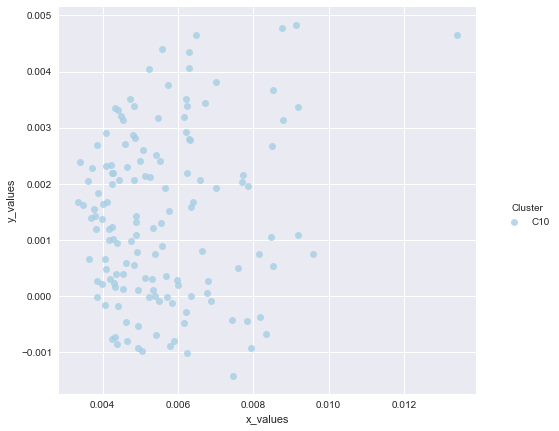

In [36]:
cluster10_dict = {}
for i in range(1,11):
    cluster10_dict[f'Cluster {i}'] = cluster10_data.loc[cluster10_data['Cluster']==f'C{i}']
    
for i in range(1,11):
    plot_cluster(cluster10_dict[f'Cluster {i}'])

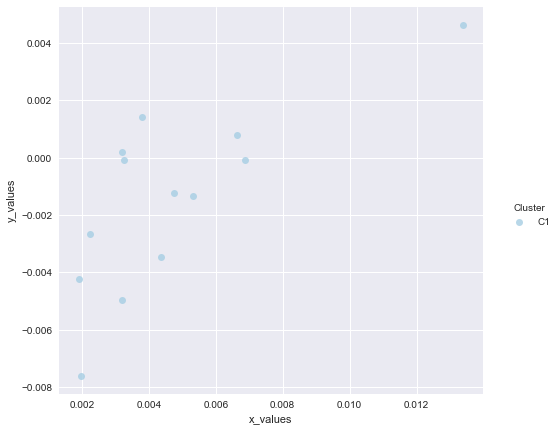

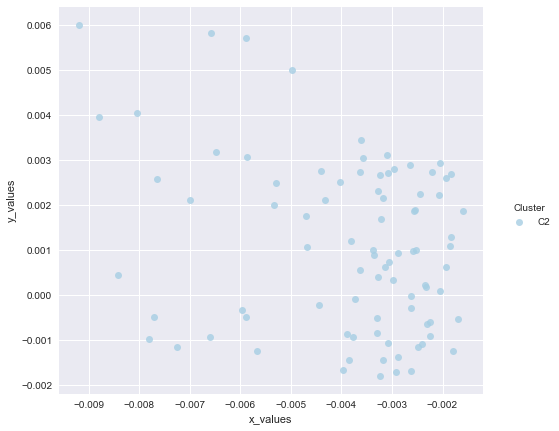

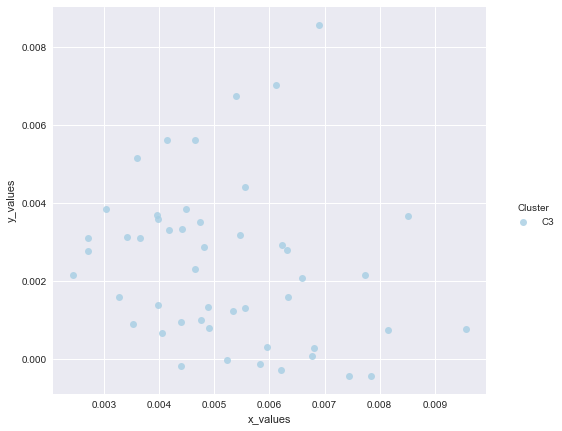

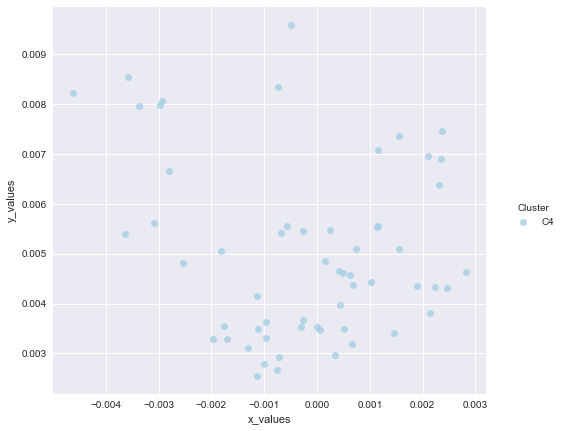

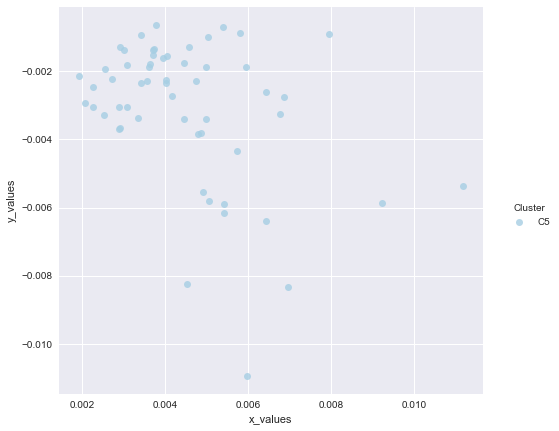

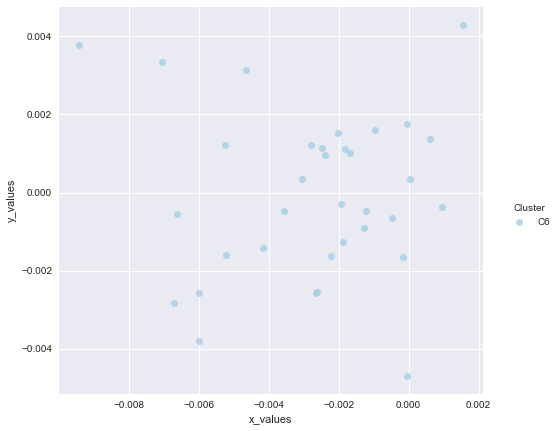

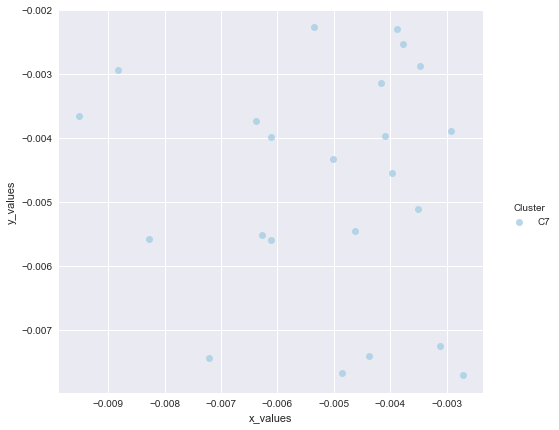

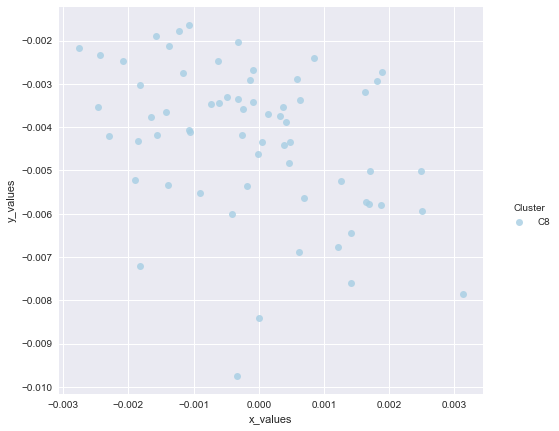

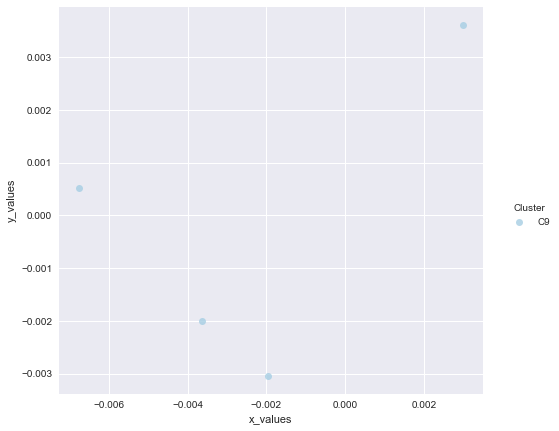

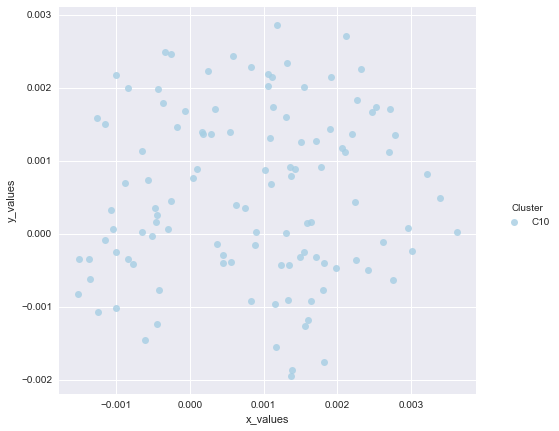

In [51]:
cluster10_dict_count = {}
for i in range(1,11):
    cluster10_dict_count[f'Cluster {i}'] = cluster10_negative.loc[cluster10_negative['Cluster']==f'C{i}']
    
for i in range(1,11):
    plot_cluster(cluster10_dict_count[f'Cluster {i}'])

In [52]:
from wordcloud import WordCloud

def create_wordcloud(name, cluster, background_color='#f7f7f7', colormap='viridis'):
    wordcloud = WordCloud(min_font_size=20, prefer_horizontal=1, max_words=20, background_color=background_color, width=800, height=400, colormap=colormap, random_state=1).generate_from_frequencies(dict(cluster))
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud)
    plt.title(f'{name} Word Cloud')
    plt.axis('off')
    plt.show()

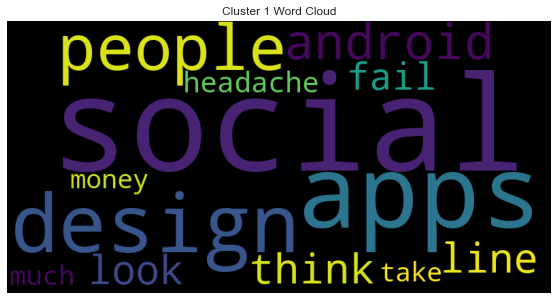

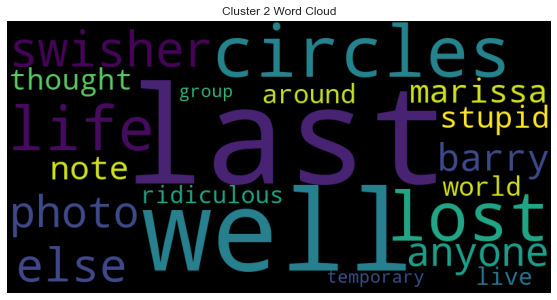

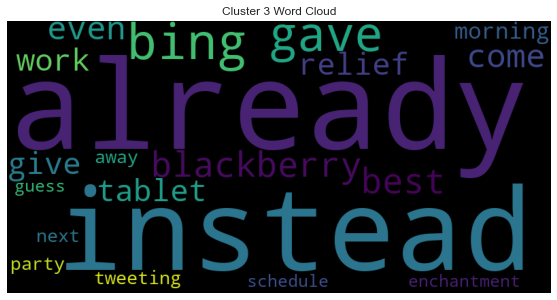

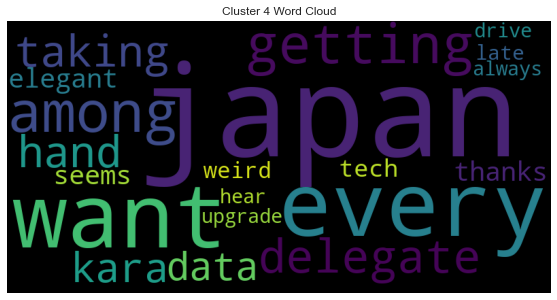

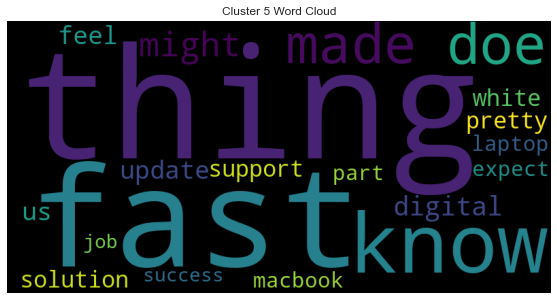

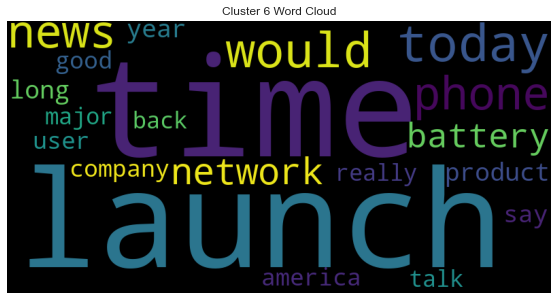

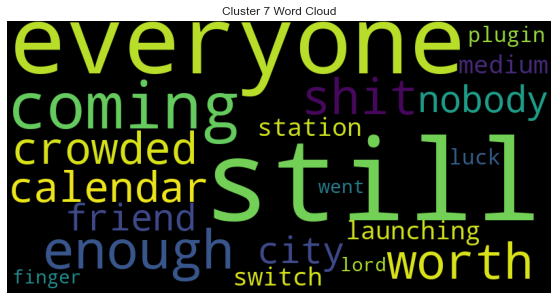

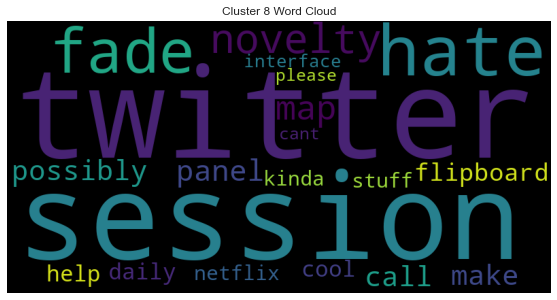

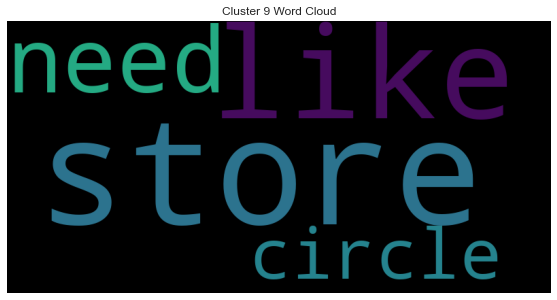

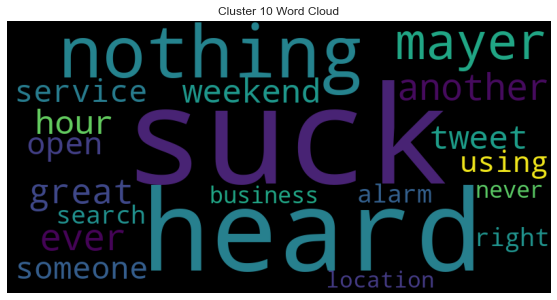

In [53]:
for key, val in cluster10_dict_count.items():
    word_count = val[['word', 'count']].sort_values('count', ascending=False).reset_index(drop=True)
    cluster_freq = []
    for i in range(len(word_count)):
        cluster_freq.append((word_count.loc[i, 'word'], word_count.loc[i, 'count']))
    create_wordcloud(key, cluster_freq, background_color='black')

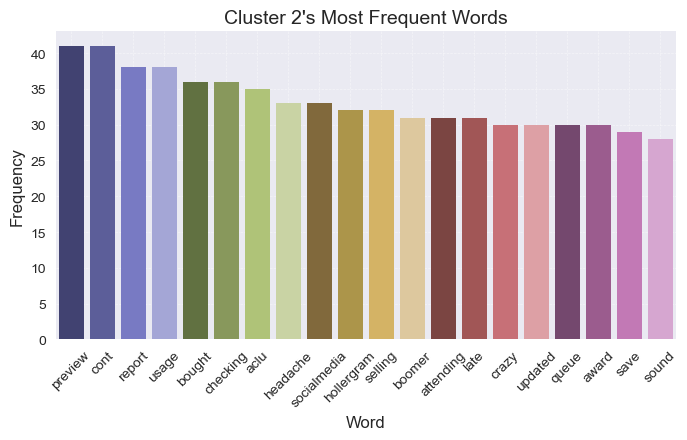

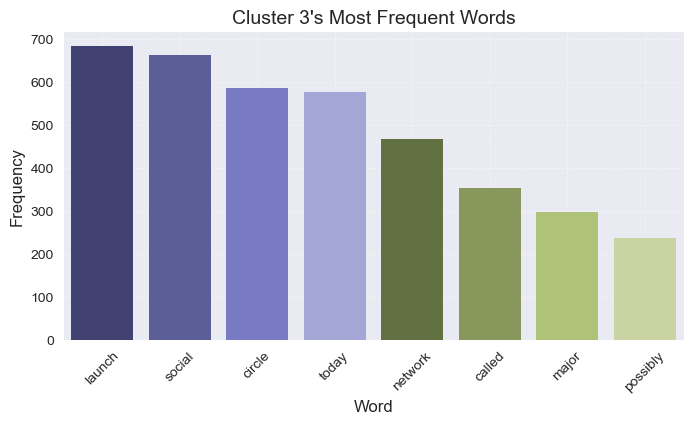

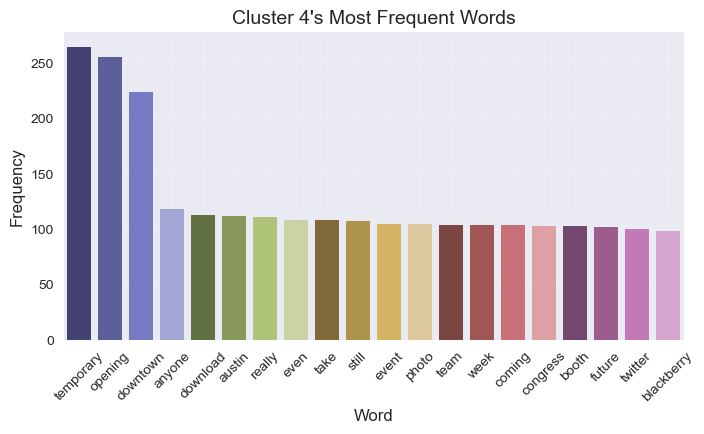

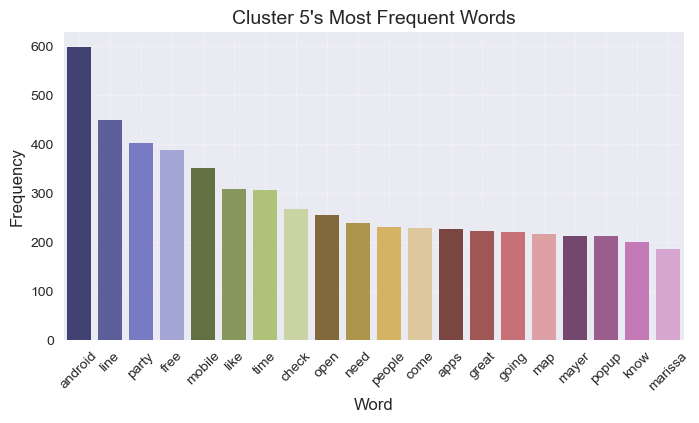

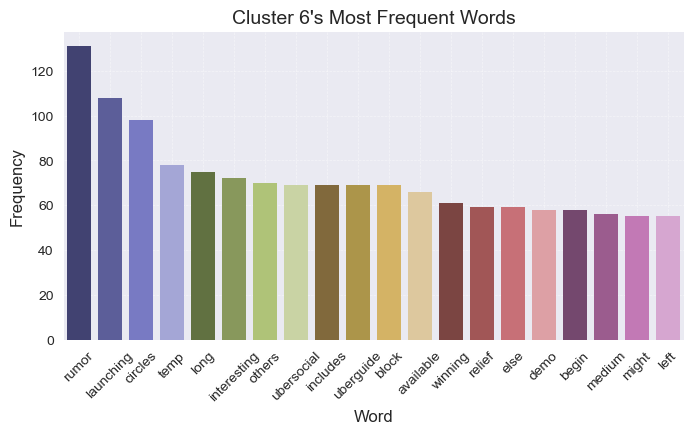

In [149]:
for key, val in cluster_dict.items():
    if key == 'Cluster 1':
        continue
    word_count = val[['word', 'count']].sort_values('count', ascending=False).reset_index(drop=True)
    
    fig, ax = plt.subplots(figsize=(8, 4))
    ax = sns.barplot(x='word', y='count', data=word_count.head(20), palette='tab20b', zorder=3)
    ax.set_title(f"{key}'s Most Frequent Words", fontsize=14)
    ax.set_xlabel('Word', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(linestyle = '--', linewidth = 0.5, alpha=.5, zorder=0)

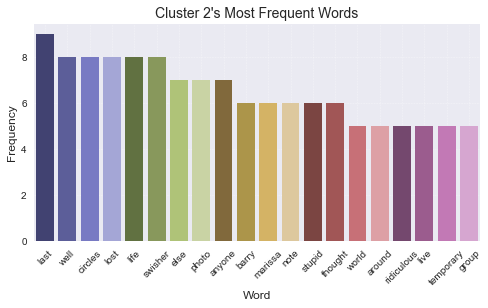

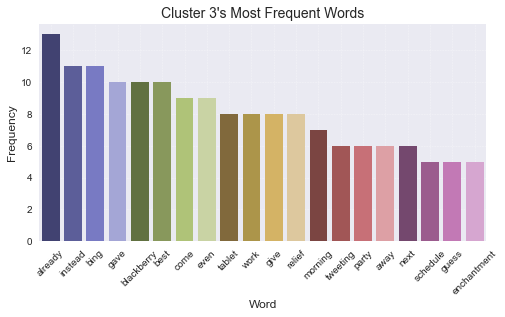

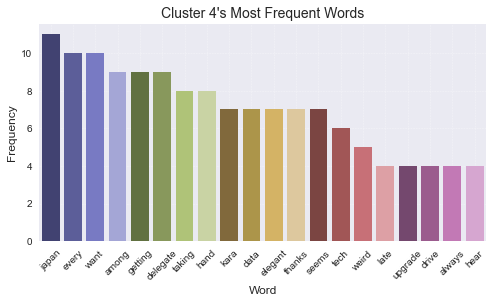

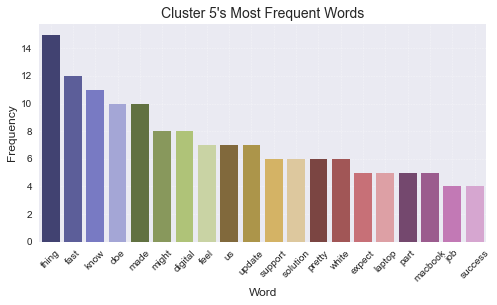

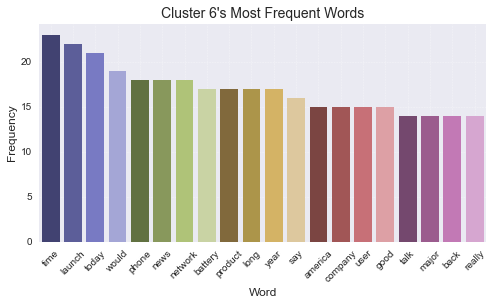

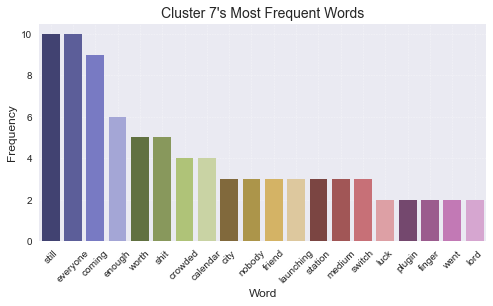

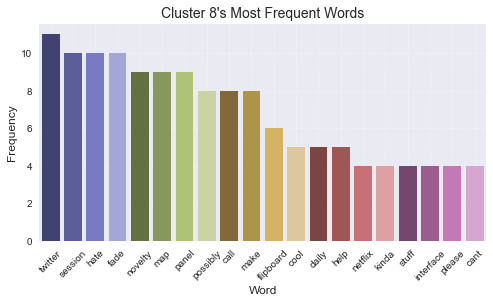

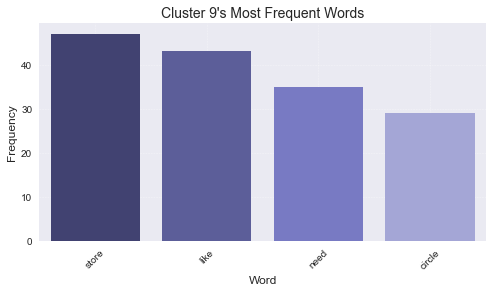

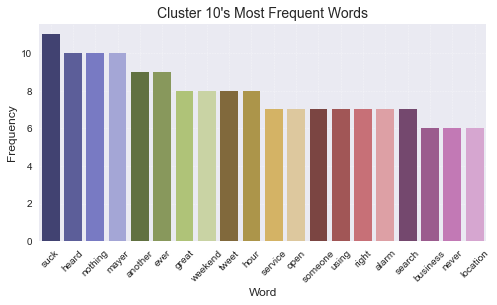

In [54]:
for key, val in cluster10_dict_count.items():
    if key == 'Cluster 1':
        continue
    word_count = val[['word', 'count']].sort_values('count', ascending=False).reset_index(drop=True)
    
    fig, ax = plt.subplots(figsize=(8, 4))
    ax = sns.barplot(x='word', y='count', data=word_count.head(20), palette='tab20b', zorder=3)
    ax.set_title(f"{key}'s Most Frequent Words", fontsize=14)
    ax.set_xlabel('Word', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(linestyle = '--', linewidth = 0.5, alpha=.5, zorder=0)

In [159]:
words_2k = pd.DataFrame(counter_all.most_common(2000))

words_2k['word'] = words_2k.iloc[0:, 0]
words_2k['count'] = words_2k.iloc[0:, 1]
words_2k = words_2k[['word','count']]
words_2k.to_csv('top2000_words.csv', columns=['word','count'], index=False)

# restriction to 100 most frequent words
top2000_words = pd.read_csv('top2000_words.csv')
PCA_data_top_2000 = PCA_data_complet.merge(top2000_words, how='inner', left_on='word',right_on='word')
PCA_data_top_2000.to_csv('PCA_data_top_2000.csv', index=False)

In [162]:
cluster2 = process_data('data/cluster2000/cluster2_2000.csv')
cluster3 = process_data('data/cluster2000/cluster3_2000.csv')
cluster4 = process_data('data/cluster2000/cluster4_2000.csv')
cluster5 = process_data('data/cluster2000/cluster5_2000.csv')
cluster6 = process_data('data/cluster2000/cluster6_2000.csv')
cluster7 = process_data('data/cluster2000/cluster7_2000.csv')
cluster8 = process_data('data/cluster2000/cluster8_2000.csv')
cluster9 = process_data('data/cluster2000/cluster9_2000.csv')
cluster10 = process_data('data/cluster2000/cluster10_2000.csv')

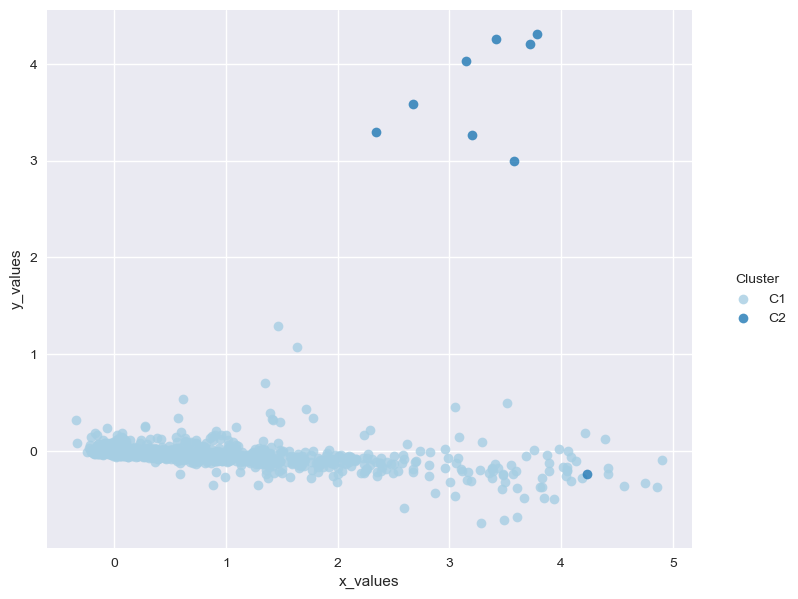

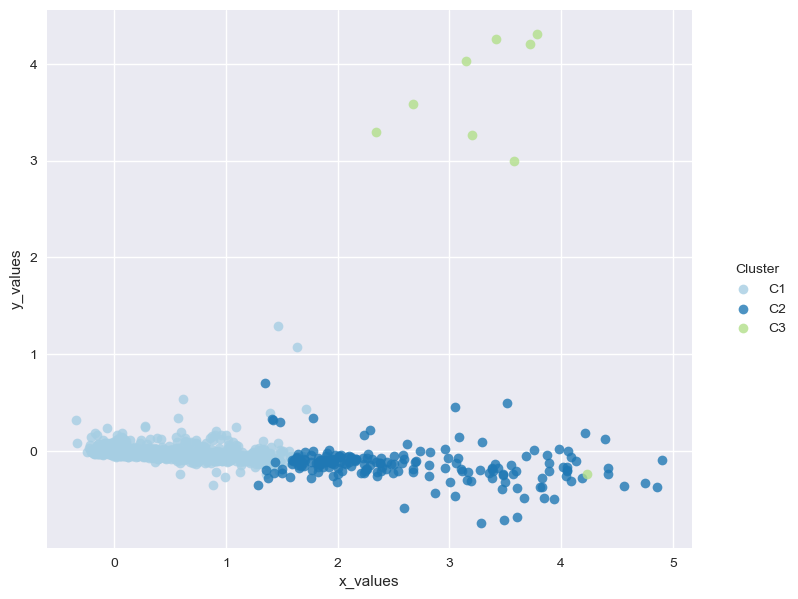

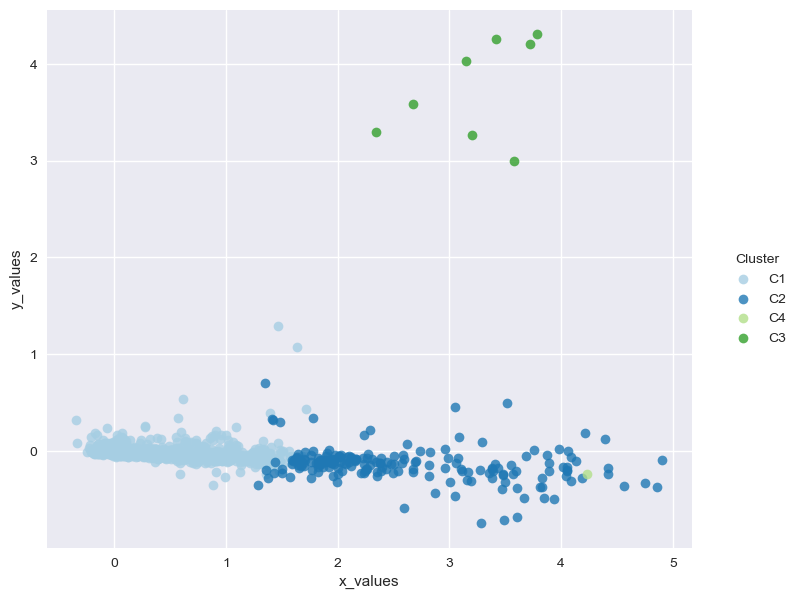

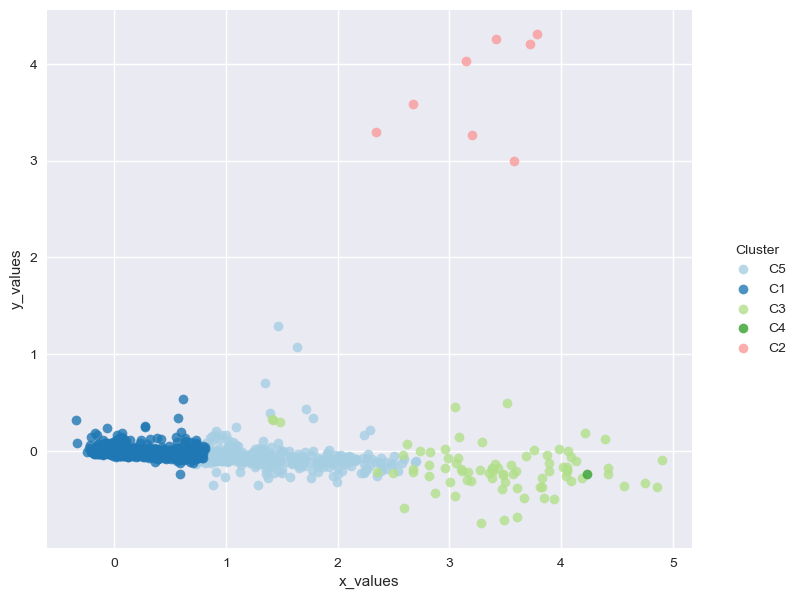

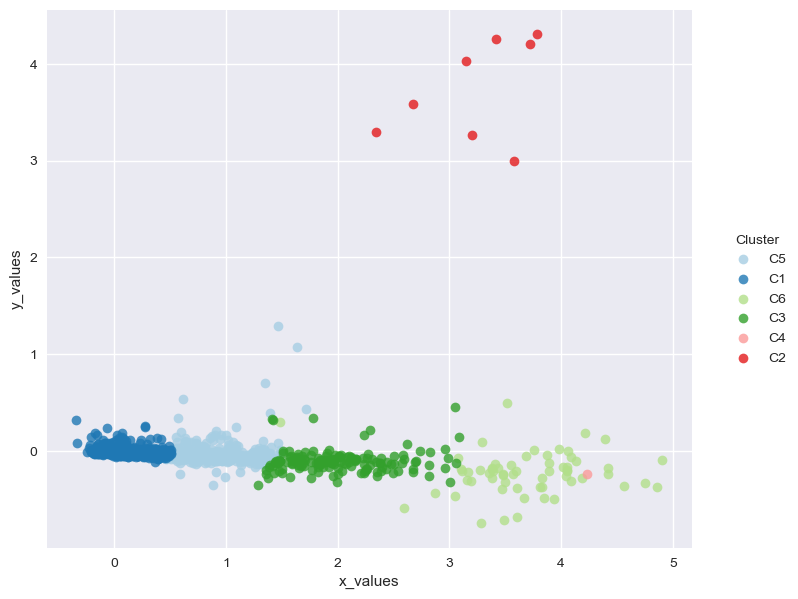

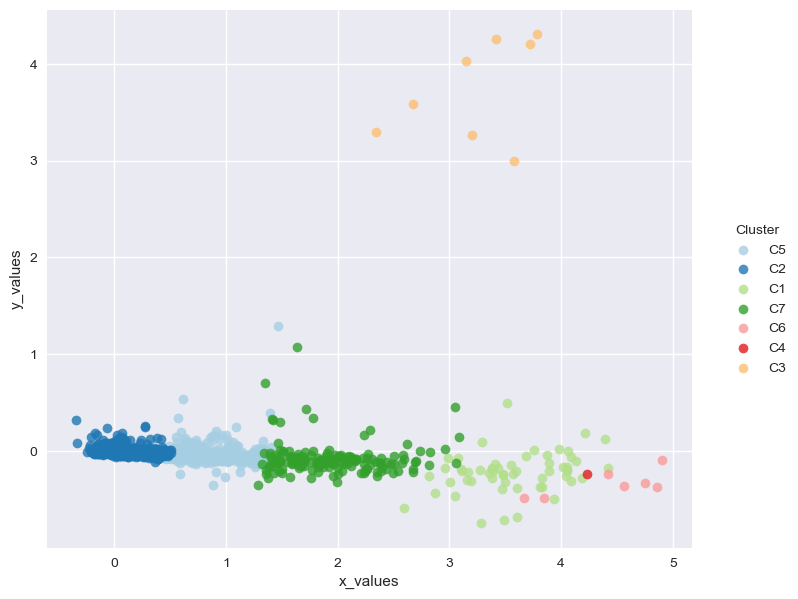

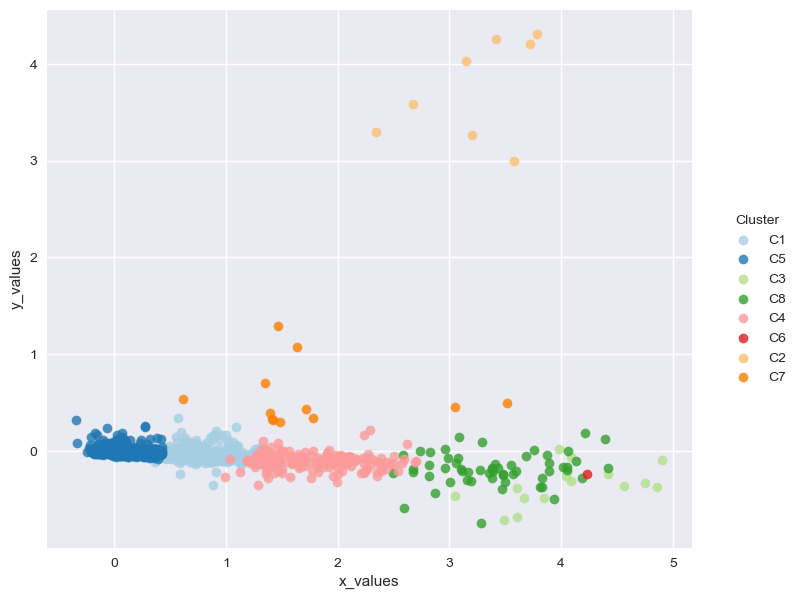

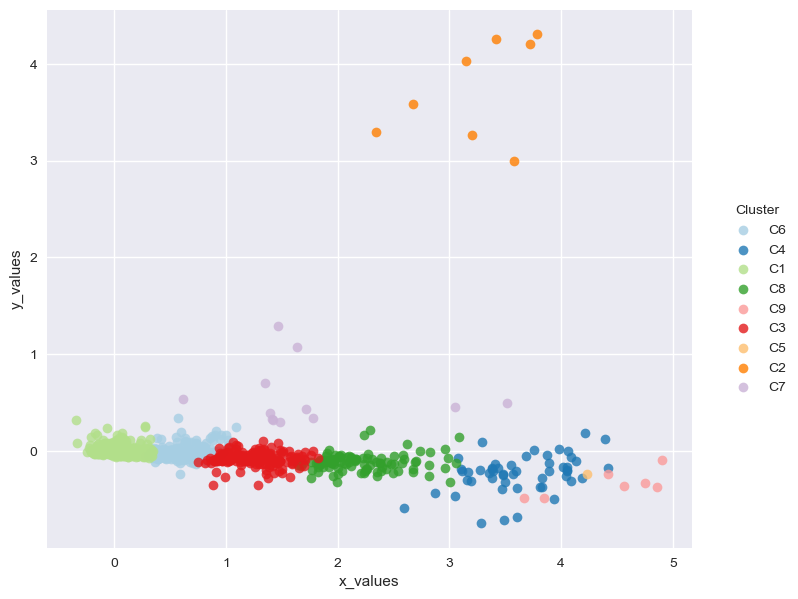

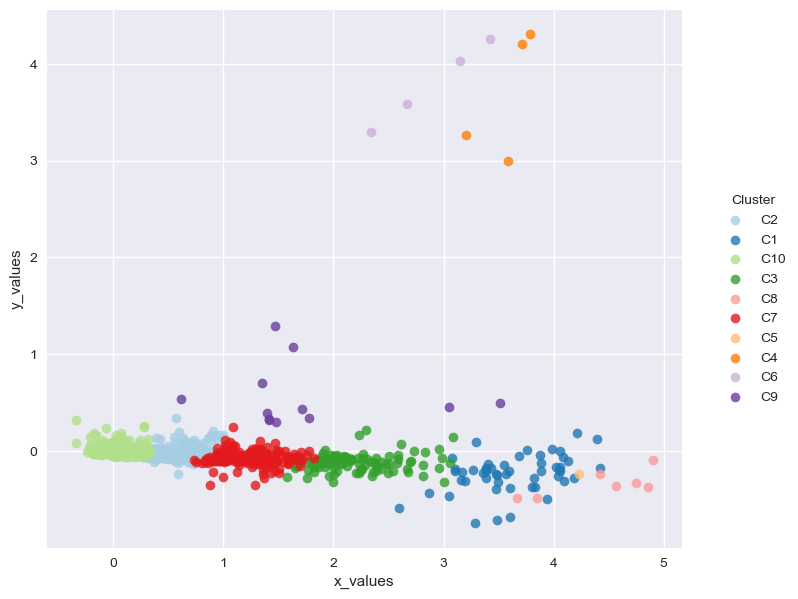

In [170]:
cluster_list = [cluster2, cluster3, cluster4, cluster5, cluster6, cluster7, cluster8, cluster9, cluster10]

for cluster in cluster_list:
    plot_cluster(cluster)

In [55]:
X_processed = PCA(n_components=2).fit_transform(data['clean'])
X_processed3d = PCA(n_components=3).fit_transform(X)

ValueError: could not convert string to float: 'tweeting rise dead need upgrade plugin station'

In [56]:
pca = PCA(n_components=3)
PCA3_result = pca.fit_transform(vectors)
PCA3_result = pd.DataFrame(PCA3_result)

In [ ]:


PCA3_result['x_values'] =PCA_result.iloc[0:, 0]
PCA3_result['y_values'] =PCA_result.iloc[0:, 1]
PCA3_final = pd.merge(words, PCA_result, left_index=True, right_index=True)
PCA_final['word'] =PCA_final.iloc[0:, 0]
PCA_data_complet =PCA_final[['word','x_values','y_values']]

words_2k = pd.DataFrame(counter_all.most_common(2000))

words_2k['word'] = words_2k.iloc[0:, 0]
words_2k['count'] = words_2k.iloc[0:, 1]
words_2k = words_2k[['word','count']]
words_2k.to_csv('top2000_words.csv', columns=['word','count'], index=False)

# restriction to 100 most frequent words
top2000_words = pd.read_csv('top2000_words.csv')
PCA_data_top_2000 = PCA_data_complet.merge(top2000_words, how='inner', left_on='word',right_on='word')
PCA_data_top_2000.to_csv('PCA_data_top_2000.csv', index=False)

In [57]:
X_processed = np.array(PCA_result)
X_processed3d = np.array(PCA3_result)

In [58]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [59]:
cluster = AgglomerativeClustering()
cluster.fit(X_processed)
silhouette_score(X_processed, cluster.labels_)

0.29921195

In [60]:
def test_n_for_clustering(n, data):
    from sklearn.cluster import AgglomerativeClustering
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_score, silhouette_samples
    # Fit the new clustering model
    cluster = AgglomerativeClustering(n_clusters=n)
    cluster.fit(data)
    # Print the silhouette score
    print(silhouette_score(data,cluster.labels_))
    # Return the labels attribute from the fit clustering model
    return cluster.labels_

0.29921195


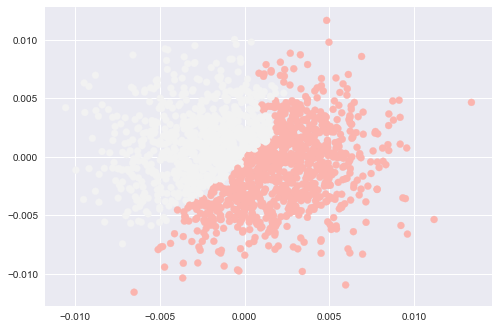

0.30090946


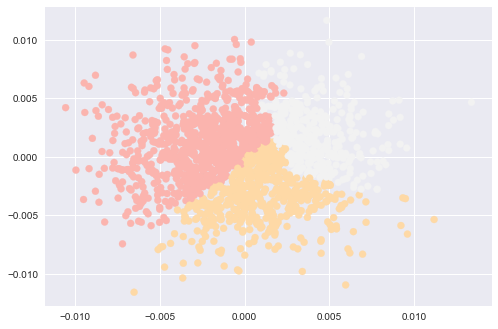

0.28388745


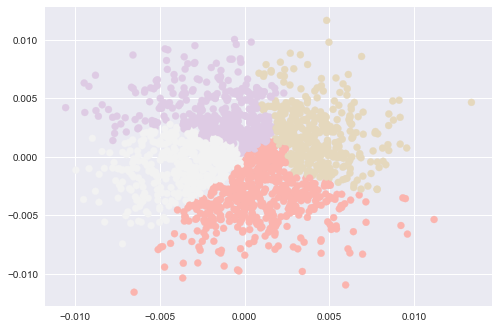

0.2666846


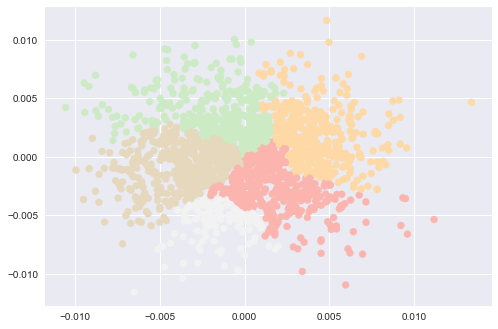

0.24550937


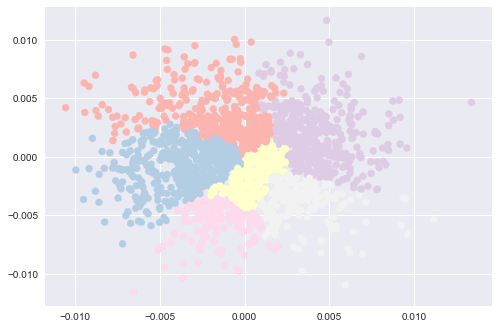

0.23150685


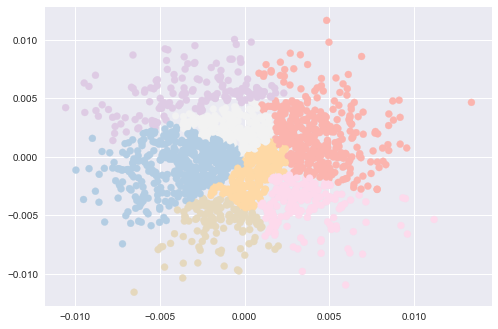

0.24181461


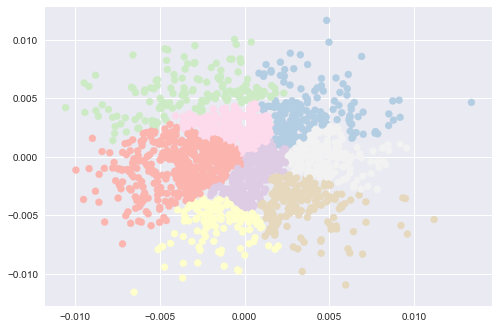

In [61]:
for n in range(2, 9):
    plt.scatter(x=X_processed[:,0], y=X_processed[:,1],c=test_n_for_clustering(n, X_processed), cmap='Pastel1')
    plt.show()

0.17590141


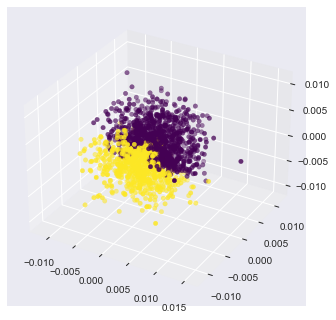

0.15775026


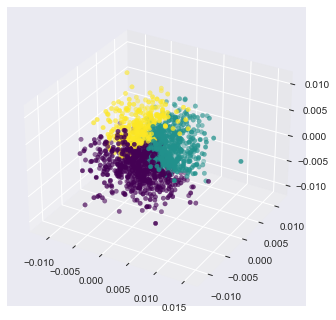

0.1682088


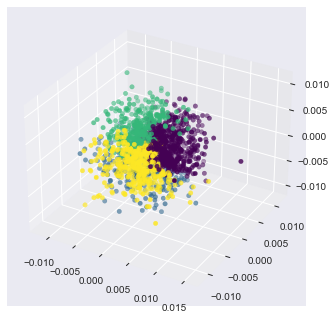

0.16640346


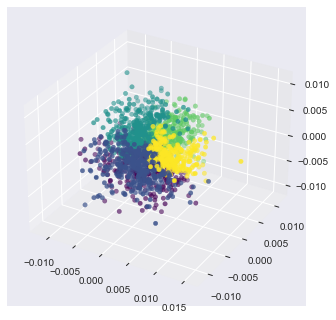

0.16598883


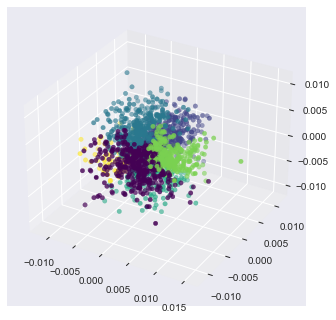

0.15907224


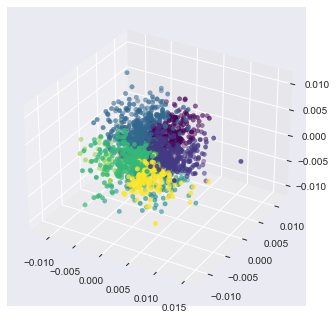

0.15580107


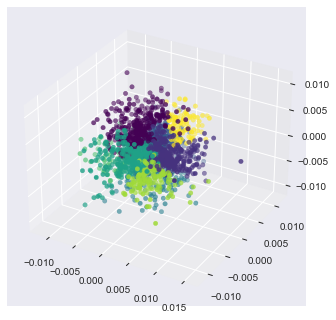

In [62]:
for n in range(2, 9):
    ax = plt.axes(projection='3d')
    ax.scatter3D(X_processed3d[:, 0], X_processed3d[:, 1], X_processed3d[:, 2], c=test_n_for_clustering(n, X_processed3d), cmap='viridis')
    plt.show()